# CPP知乎专栏 数据分析

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
import json

def read_json(fname):
    with open(fname) as f:
        data = f.read()
        data = json.loads(data)
    return data

In [10]:
# 用户关注和点赞数据
followers = read_json('data/followerList.json')
posts = read_json('data/postsList.json')
articles = read_json('data/articleLikeList.json')
iGuo_followers = read_json('data/iGuoFollowerList.json')

In [8]:
# 总文章数量
len(posts)

104

## 专栏点赞和关注用户分析

In [12]:
# 总点赞数量
articles_likes = []
for i in articles.values():
    articles_likes.extend(i)
len(articles_likes)

9308

In [13]:
# 不重复总点赞数
articles_likes_distinct = set(articles_likes)
len(articles_likes_distinct)

6851

In [14]:
# 总关注数量
followers = set(followers)
len(followers)

7000

In [33]:
# 关注并点赞
len(followers&articles_likes_distinct)

1647

In [16]:
# 高频点赞（10及以上）用户
from collections import Counter
articles_likes_stats = Counter(articles_likes)
articles_likes_stats.most_common(40)

[(u'jiang-shan-73-5', 78),
 (u'zhang_guo', 61),
 (u'er-dong-hao', 38),
 (u'zha-cheng-67', 36),
 (u'liu-li-94-49', 30),
 (u'liu-xiao-man-3-2', 29),
 (u'dementia-otoma', 21),
 (u'felix-zhu-23', 21),
 (u'du-xue-yang-Stella', 21),
 (u'zcp-30-32', 18),
 (u'kevin-hill', 18),
 (u'yue-zhong-xin-63', 17),
 (u'chen-qian-87-81', 16),
 (u'gao-han-12-9', 15),
 (u'JasonZhangyj', 15),
 (u'ma-xian-sheng-54', 15),
 (u'qiu-kun', 14),
 (u'vercase', 14),
 (u'christing-25', 14),
 (u'david-qian-51', 14),
 (u'ben-hembert', 14),
 (u'yuen-wong-17', 13),
 (u'xiao-xie-xie-14', 12),
 (u'zhilong-zhang-69', 12),
 (u'cpp-45-10', 12),
 (u'xiao-yao-wen-wen', 12),
 (u'jiakelong', 11),
 (u'ceng-xiao-yu-68', 11),
 (u'jung-freud', 11),
 (u'hua-tian-qing', 10),
 (u'zhang-wei-xian-35', 10),
 (u'Gorbachev', 10),
 (u'ann-huang', 10),
 (u'potter-here', 10),
 (u'sushengbuhuo', 9),
 (u'zhao-xing-fei-12', 9),
 (u'figo-von', 9),
 (u'wang-kun-48-12', 9),
 (u'xiang.ming', 9),
 (u'jin-xuan-yi-97', 9)]

非CPP团队成员、认识的：
- https://www.zhihu.com/people/zha-cheng-67/answers
- https://www.zhihu.com/people/gao-han-12-9/answers
- https://www.zhihu.com/people/qiu-kun/answers
- https://www.zhihu.com/people/hua-tian-qing/answers
- 
- https://www.zhihu.com/people/jin-xuan-yi-97/answers

非CPP团队成员、不认识的：
- https://www.zhihu.com/people/er-dong-hao
- https://www.zhihu.com/people/zcp-30-32/answers
- https://www.zhihu.com/people/kevin-hill/answers
- https://www.zhihu.com/people/ma-xian-sheng-54/answers
- https://www.zhihu.com/people/vercase/answers
- https://www.zhihu.com/people/ben-hembert/activities
- https://www.zhihu.com/people/yuen-wong-17/activities
- https://www.zhihu.com/people/zhilong-zhang-69/activities
- https://www.zhihu.com/people/jiakelong/answers
- https://www.zhihu.com/people/ceng-xiao-yu-68/answers
- https://www.zhihu.com/people/jung-freud/answers
- https://www.zhihu.com/people/Gorbachev/answers
- https://www.zhihu.com/people/ann-huang/activities
- https://www.zhihu.com/people/potter-here/answers
- 
- https://www.zhihu.com/people/sushengbuhuo/answers
- https://www.zhihu.com/people/zhao-xing-fei-12/activities
- https://www.zhihu.com/people/figo-von/answers
- https://www.zhihu.com/people/wang-kun-48-12/answers
- https://www.zhihu.com/people/xiang.ming/answers

(array([ 689.,    0.,    0.,    0.,  182.,    0.,    0.,    0.,   75.,
           0.,    0.,    0.,   41.,    0.,    0.,    0.,    0.,   23.,
           0.,    0.,    0.,   23.,    0.,    0.,    0.,   11.,    0.,
           0.,    0.,    7.]),
 array([ 2.        ,  2.23333333,  2.46666667,  2.7       ,  2.93333333,
         3.16666667,  3.4       ,  3.63333333,  3.86666667,  4.1       ,
         4.33333333,  4.56666667,  4.8       ,  5.03333333,  5.26666667,
         5.5       ,  5.73333333,  5.96666667,  6.2       ,  6.43333333,
         6.66666667,  6.9       ,  7.13333333,  7.36666667,  7.6       ,
         7.83333333,  8.06666667,  8.3       ,  8.53333333,  8.76666667,  9.        ]),
 <a list of 30 Patch objects>)

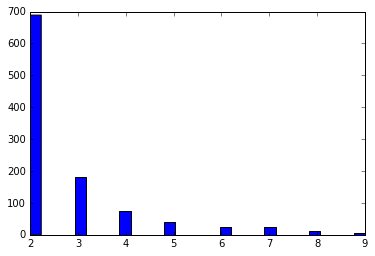

In [18]:
# 点赞2-9次的用户
% matplotlib inline
tmp = np.array(dict(articles_likes_stats).values())
plt.hist(tmp[(tmp>1)&(tmp<10)], bins=30)

In [19]:
# 点赞一次的用户
len(tmp[tmp==1])

5766

In [21]:
# 点赞和关注汇总数据
df1 = pd.Series(dict(articles_likes_stats),name='likes')
df2 = pd.Series(1, name='follow', index = followers)
df3 = pd.Series(1, name='iGuo', index = iGuo_followers)
df = pd.merge(df1.reset_index(), df2.reset_index(), on='index', how='outer')
df = pd.merge(df, df3.reset_index(), on='index', how='outer')
df['follow']=df['follow'].fillna(0)
df['likes']=df['likes'].fillna(0)

In [22]:
# 关注汇总数据
df_follow = df[df['follow']==1]
df_follow.describe()

,likes,follow,iGuo
count,7000.000000,7000.0,1235.0
mean,0.463857,1.0,1.0
std,1.523679,0.0,0.0
min,0.000000,1.0,1.0
25%,0.000000,1.0,1.0
50%,0.000000,1.0,1.0
75%,0.000000,1.0,1.0
max,38.000000,1.0,1.0


In [160]:
# 关注者的点赞
df_follow[df_follow['likes']>0].describe()

,likes,follow
count,1647.000000,1647.0
mean,1.971463,1.0
std,2.626352,0.0
min,1.000000,1.0
25%,1.000000,1.0
50%,1.000000,1.0
75%,2.000000,1.0
max,38.000000,1.0


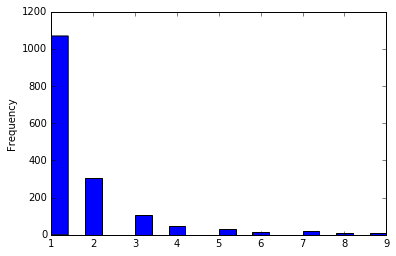

In [176]:
# 关注者的点赞分布（点赞数1-9）
df_follow[(df_follow['likes']>0)&(df_follow['likes']<10)]['likes'].plot.hist(bins=20)

In [23]:
df_iGuo = df[df['iGuo']==1]

In [25]:
df_iGuo.describe()

,likes,follow,iGuo
count,5172.000000,5172.000000,5172.0
mean,0.353442,0.238786,1.0
std,1.536755,0.426383,0.0
min,0.000000,0.000000,1.0
25%,0.000000,0.000000,1.0
50%,0.000000,0.000000,1.0
75%,0.000000,0.000000,1.0
max,38.000000,1.000000,1.0


In [28]:
# 关注专栏和关注iGuo的重合部分
len(df[(df['follow']==1)&(df['iGuo']==1)])

1235

In [30]:
# 关注专栏、关注iGuo并点赞
len(df[(df['likes']>0)&(df['follow']==1)&(df['iGuo']==1)])

443

In [32]:
# 关注iGuo并点赞
len(df[(df['likes']>0)&(df['iGuo']==1)])

859

## 专栏文章分析

In [91]:
# 专栏文章点赞数统计
articles_stats = {}
for key,value in articles.items():
    articles_stats[key] = len(value)

(array([ 53.,  26.,   9.,   7.,   4.,   0.,   1.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    3.        ,    48.56666667,    94.13333333,   139.7       ,
          185.26666667,   230.83333333,   276.4       ,   321.96666667,
          367.53333333,   413.1       ,   458.66666667,   504.23333333,
          549.8       ,   595.36666667,   640.93333333,   686.5       ,
          732.06666667,   777.63333333,   823.2       ,   868.76666667,
          914.33333333,   959.9       ,  1005.46666667,  1051.03333333,
         1096.6       ,  1142.16666667,  1187.73333333,  1233.3       ,
         1278.86666667,  1324.43333333,  1370.        ]),
 <a list of 30 Patch objects>)

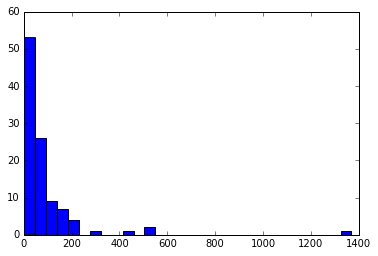

In [100]:
# 点赞数分布
% matplotlib inline
tmp = np.array(articles_stats.values())
plt.hist(tmp, bins=30)  # 图中一格是40

(array([  7.,  14.,  12.,  13.,  10.,   5.,   9.,   3.,   4.,   4.,   2.,
          4.,   1.,   0.,   2.,   0.,   1.,   2.,   2.,   0.,   1.,   1.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   3. ,   12.6,   22.2,   31.8,   41.4,   51. ,   60.6,   70.2,
          79.8,   89.4,   99. ,  108.6,  118.2,  127.8,  137.4,  147. ,
         156.6,  166.2,  175.8,  185.4,  195. ,  204.6,  214.2,  223.8,
         233.4,  243. ,  252.6,  262.2,  271.8,  281.4,  291. ]),
 <a list of 30 Patch objects>)

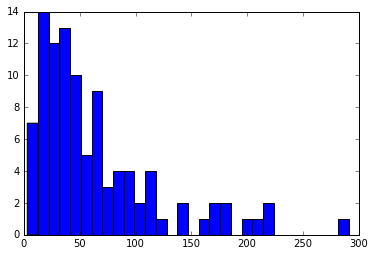

In [103]:
# 小于400点赞的点赞数分布
plt.hist(tmp[tmp<400],bins=30)  # 每一格是10个